In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [141]:
df.shape

(34857, 21)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [143]:
df2 = df.copy()

In [144]:
df2.isnull().sum()/len(df2)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [145]:
df2 = df2.drop(['Address', 'Propertycount', 'Postcode', 'Lattitude', 'Longtitude'], axis = 1)

In [146]:
df2.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,Abbotsford,2,h,NaN,SS,Jellis,3/09/2016,2.5,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan
2,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,3,u,NaN,VB,Rounds,4/02/2016,2.5,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan


In [147]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 16 columns):
Suburb          34857 non-null object
Rooms           34857 non-null int64
Type            34857 non-null object
Price           27247 non-null float64
Method          34857 non-null object
SellerG         34857 non-null object
Date            34857 non-null datetime64[ns]
Distance        34856 non-null float64
Bedroom2        26640 non-null float64
Bathroom        26631 non-null float64
Car             26129 non-null float64
Landsize        23047 non-null float64
BuildingArea    13742 non-null float64
YearBuilt       15551 non-null float64
CouncilArea     34854 non-null object
Regionname      34854 non-null object
dtypes: datetime64[ns](1), float64(8), int64(1), object(6)
memory usage: 4.3+ MB


In [149]:
numerical_features = df2.select_dtypes(exclude= object)

In [150]:
categorical_features = df2.select_dtypes(include= object)

In [151]:
df2.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize        11810
BuildingArea    21115
YearBuilt       19306
CouncilArea         3
Regionname          3
dtype: int64

In [152]:
df2.Car.value_counts()

2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
12.0        1
18.0        1
Name: Car, dtype: int64

In [153]:
df2.loc[df2.Car.isnull(), 'Car']  = df2.groupby('Type')['Car'].transform(lambda x: x.fillna(x.mean()))

In [154]:
df2.loc[df2.Landsize.isnull(), 'Landsize'] = df2.groupby('Type')['Landsize'].transform(lambda x:x.fillna(x.mean()))

In [155]:
df2.loc[df2.Bathroom.isnull(), 'Bathroom']  = df2.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(x.mean()))


In [156]:
df2 = df2[df2.CouncilArea.notnull()]

In [157]:
df2.loc[df2.Price.isnull(), 'Price'] = df2.groupby('Suburb')['Price'].transform(lambda x:x.fillna(x.mean()))

In [158]:
df2 = df2[df2['Price'].notnull()]

In [159]:
df2 = df2.drop('YearBuilt', axis =1)

In [160]:
df2.loc[df2.Bedroom2.isnull(), 'Bedroom2'] = df2.groupby('Suburb')['Bedroom2'].transform(lambda x:x.fillna(x.mean()))

In [161]:
df2 = df2[df2['Bedroom2'].notnull()]

In [162]:
df2.loc[df2.BuildingArea.isnull(), 'BuildingArea'] = df2.groupby('Suburb')['BuildingArea'].transform(lambda x:x.fillna(x.mean()))

In [163]:
df2 = df2[df2['BuildingArea'].notnull()]

In [164]:
df2.isnull().sum()

Suburb          0
Rooms           0
Type            0
Price           0
Method          0
SellerG         0
Date            0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
CouncilArea     0
Regionname      0
dtype: int64

In [165]:
df2.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname
0,Abbotsford,2,h,1.033549e+06,SS,Jellis,2016-03-09,2.5,2.0,1.0,1.0,126.0,103.610169,Yarra City Council,Northern Metropolitan
1,Abbotsford,2,h,1.480000e+06,S,Biggin,2016-03-12,2.5,2.0,1.0,1.0,202.0,103.610169,Yarra City Council,Northern Metropolitan
2,Abbotsford,2,h,1.035000e+06,S,Biggin,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.000000,Yarra City Council,Northern Metropolitan
3,Abbotsford,3,u,1.033549e+06,VB,Rounds,2016-04-02,2.5,3.0,2.0,1.0,0.0,103.610169,Yarra City Council,Northern Metropolitan
4,Abbotsford,3,h,1.465000e+06,SP,Biggin,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.000000,Yarra City Council,Northern Metropolitan


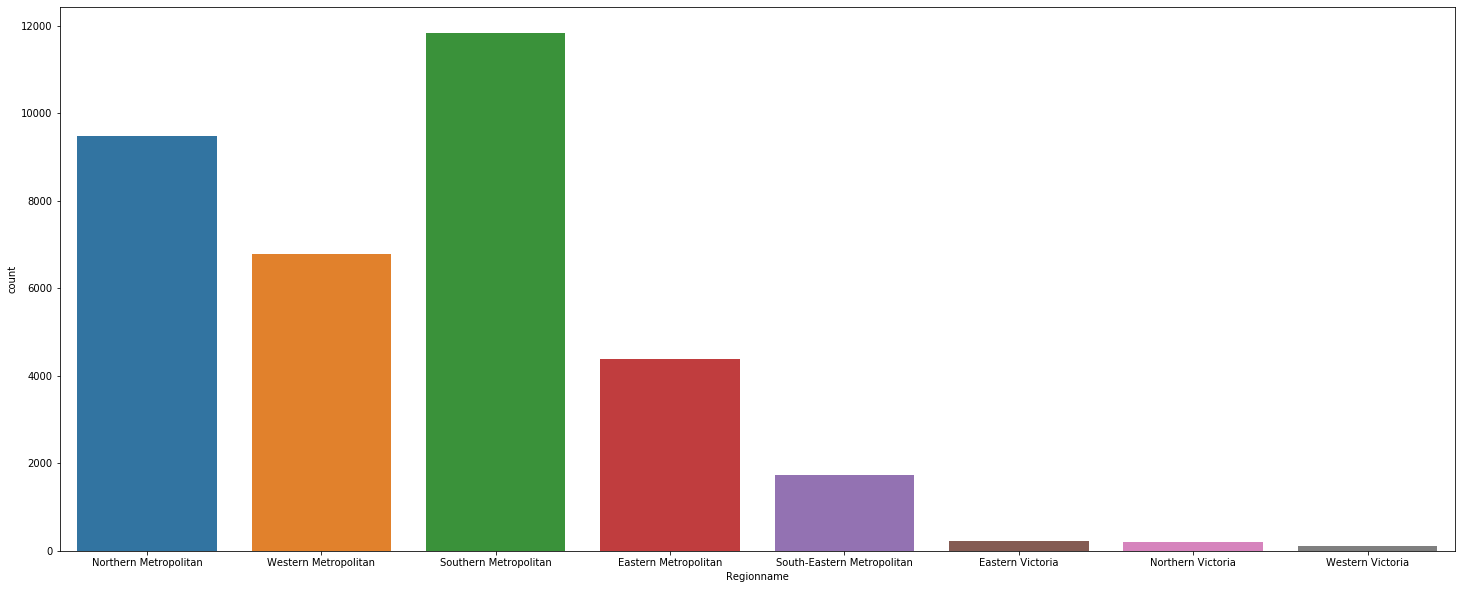

In [167]:
fig = plt.figure(figsize=(25,10))
sns.countplot(df2['Regionname'])
## We have large number of southern Metropolitan data followed by northern. Least is Western Victoria

In [168]:
df2.Rooms.value_counts()

3     15014
2      8309
4      7927
5      1734
1      1478
6       203
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

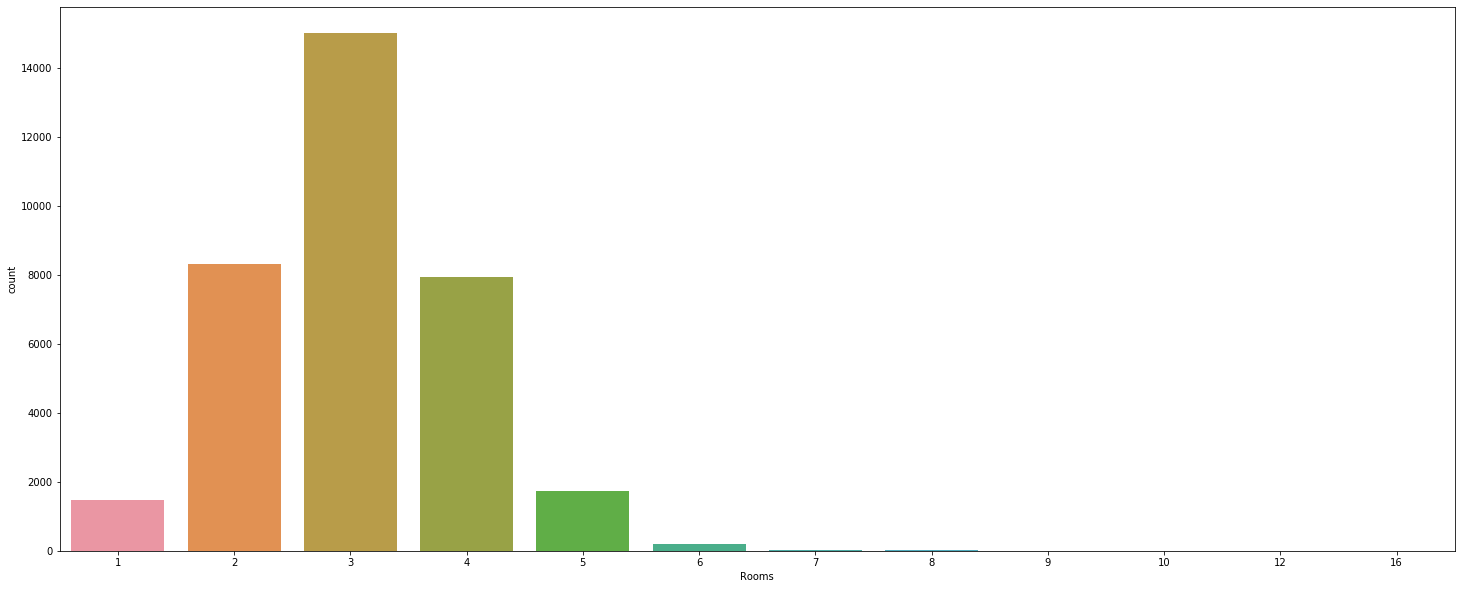

In [169]:
fig = plt.figure(figsize=(25,10))
sns.countplot(df2['Rooms'])
## We have large number of 3 rooms in our data followed by 2 rooms. Only 1 we have 16 rooms

In [170]:
df2['CouncilArea'].value_counts()
## Boroondara City council is the maximum no. of data and least is Moorabool

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Moonee Valley City Council        1791
Banyule City Council              1777
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1211
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              866
Whittlesea City Council            828
Wyndham City Council               622
Whitehorse City Council            618
Maroondah City Council             505
Knox City Council                  371
Greater Dandenong City Council     314
Frankston City Council             290
Melton City Council      

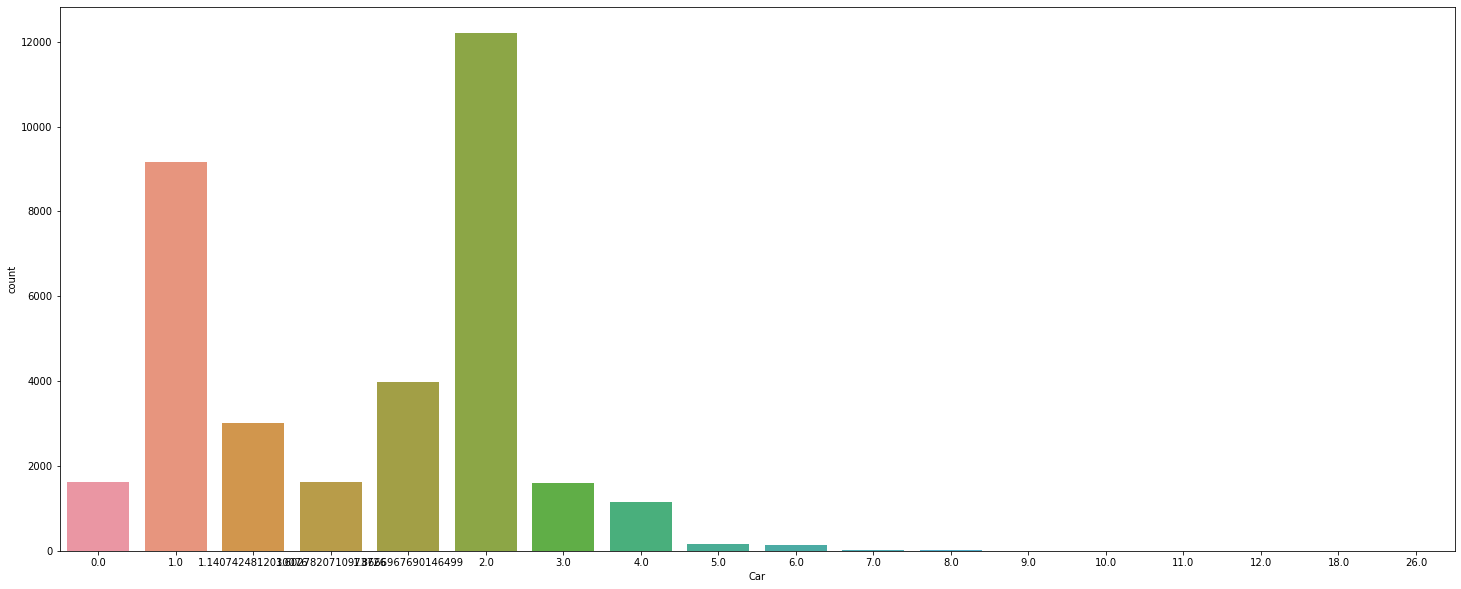

In [171]:
fig = plt.figure(figsize=(25,10))
sns.countplot(df2['Car'])
## We have 2 car in maximum time

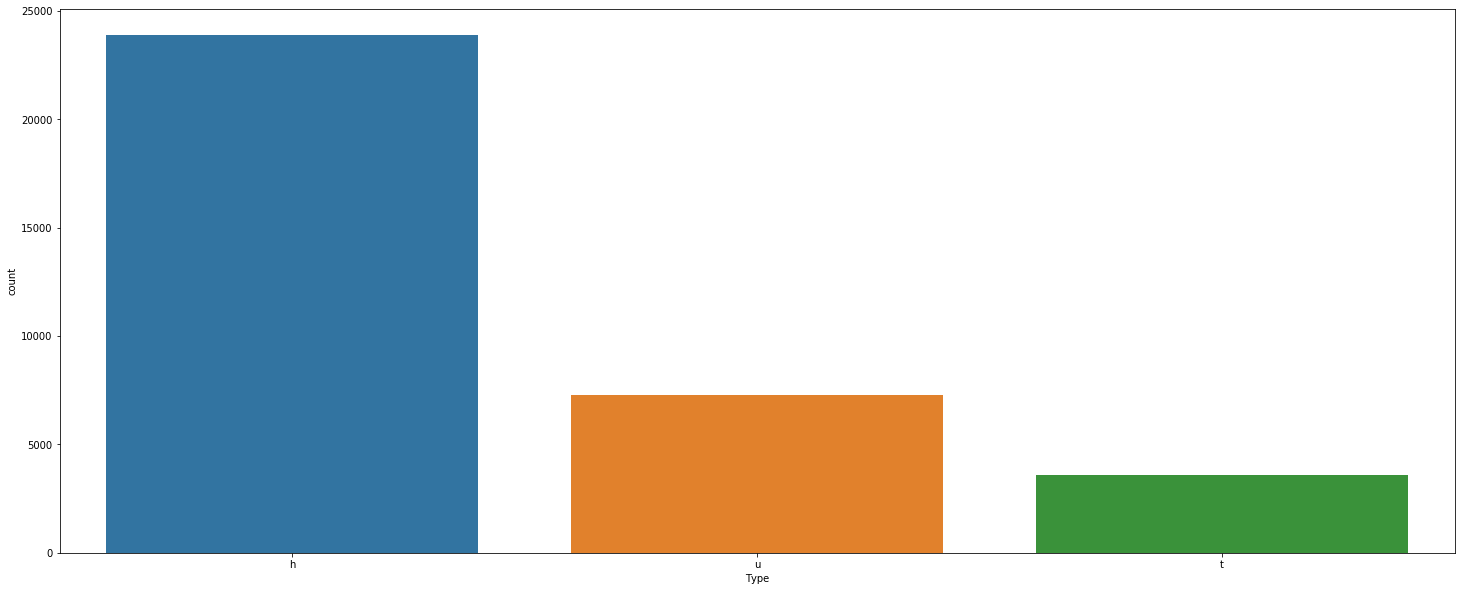

In [172]:
fig = plt.figure(figsize=(25,10))
sns.countplot(df2['Type'])
## We have large number of house,cottage,villa, semi,terrace

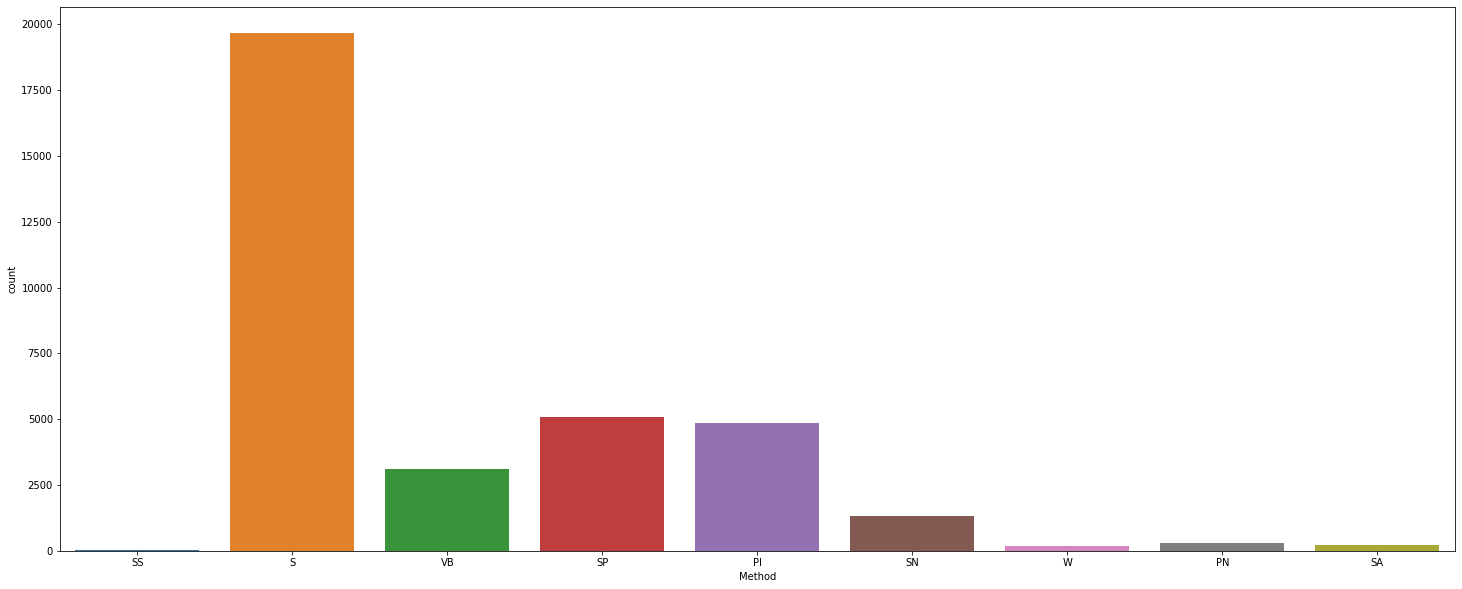

In [173]:
fig = plt.figure(figsize=(25,10))
sns.countplot(df2['Method'])
## We have large number of property sold

In [174]:
df3 = df2.copy()

In [175]:
df3['Year'] = df3['Date'].apply(lambda x:x.year)
df3.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Year
0,Abbotsford,2,h,1.033549e+06,SS,Jellis,2016-03-09,2.5,2.0,1.0,1.0,126.0,103.610169,Yarra City Council,Northern Metropolitan,2016
1,Abbotsford,2,h,1.480000e+06,S,Biggin,2016-03-12,2.5,2.0,1.0,1.0,202.0,103.610169,Yarra City Council,Northern Metropolitan,2016
2,Abbotsford,2,h,1.035000e+06,S,Biggin,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.000000,Yarra City Council,Northern Metropolitan,2016
3,Abbotsford,3,u,1.033549e+06,VB,Rounds,2016-04-02,2.5,3.0,2.0,1.0,0.0,103.610169,Yarra City Council,Northern Metropolitan,2016
4,Abbotsford,3,h,1.465000e+06,SP,Biggin,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.000000,Yarra City Council,Northern Metropolitan,2017


In [176]:
df3['Type'].value_counts()

h    23886
u     7273
t     3571
Name: Type, dtype: int64

In [177]:
## Price vs year per house type
df3_h = df3[df3['Type'] == 'h']
df3_u = df3[df3['Type'] == 'u']
df3_t = df3[df3['Type'] == 't']
df3_h_y = df3_h.groupby('Year').mean()
df3_u_y = df3_u.groupby('Year').mean()
df3_t_y = df3_t.groupby('Year').mean()

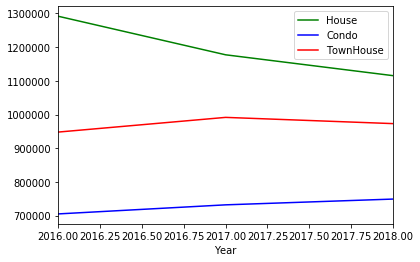

In [178]:
df3_h_y['Price'].plot(kind='line', color='g',label='House')
df3_u_y['Price'].plot(kind='line', color='b',label='Condo')
df3_t_y['Price'].plot(kind='line', color='r',label='TownHouse')
plt.legend()

In [179]:
df3['Month'] = df3['Date'].apply(lambda x:x.month)
df3.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Year,Month
0,Abbotsford,2,h,1.033549e+06,SS,Jellis,2016-03-09,2.5,2.0,1.0,1.0,126.0,103.610169,Yarra City Council,Northern Metropolitan,2016,3
1,Abbotsford,2,h,1.480000e+06,S,Biggin,2016-03-12,2.5,2.0,1.0,1.0,202.0,103.610169,Yarra City Council,Northern Metropolitan,2016,3
2,Abbotsford,2,h,1.035000e+06,S,Biggin,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.000000,Yarra City Council,Northern Metropolitan,2016,4
3,Abbotsford,3,u,1.033549e+06,VB,Rounds,2016-04-02,2.5,3.0,2.0,1.0,0.0,103.610169,Yarra City Council,Northern Metropolitan,2016,4
4,Abbotsford,3,h,1.465000e+06,SP,Biggin,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.000000,Yarra City Council,Northern Metropolitan,2017,4


In [180]:
df3_2016 = df3[df3['Year'] == 2016]
df3_2017 = df3[df3['Year'] == 2017]
df3_2018 = df3[df3['Year'] == 2018]

In [182]:
df3_2016_total = df3_2016.groupby(['Month']).count()
df3_2017_total = df3_2017.groupby(['Month']).count()
df3_2018_total = df3_2018.groupby(['Month']).count()

In [208]:
label_2016=['January','March','April','May','June','July','August','September','October','November','December']
label_2017=['January','February','March','April','May','June','July','August','September','October','November','December']
label_2018=['January','February','March','June','October']

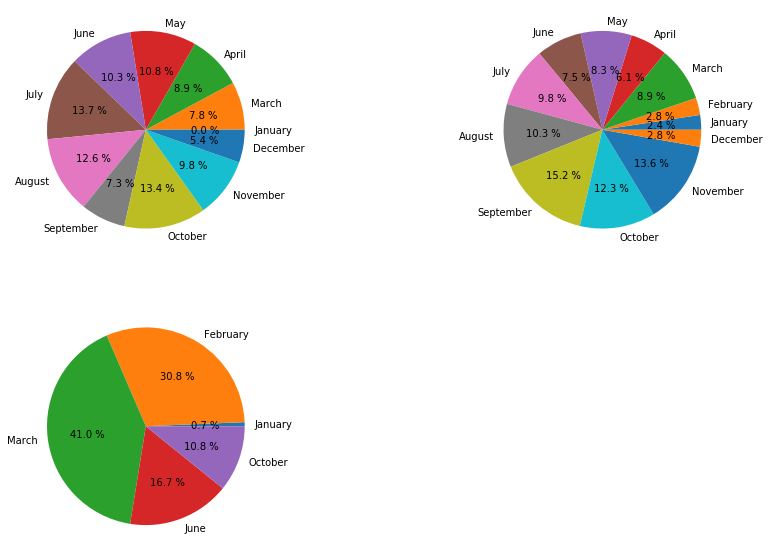

In [209]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.pie(df3_2016_total['Price'],labels=label_2016,autopct='%.1f %%')
ax2.pie(df3_2017_total['Price'],labels=label_2017,autopct='%.1f %%')
ax3.pie(df3_2018_total['Price'],labels=label_2018,autopct='%.1f %%')
plt.show()

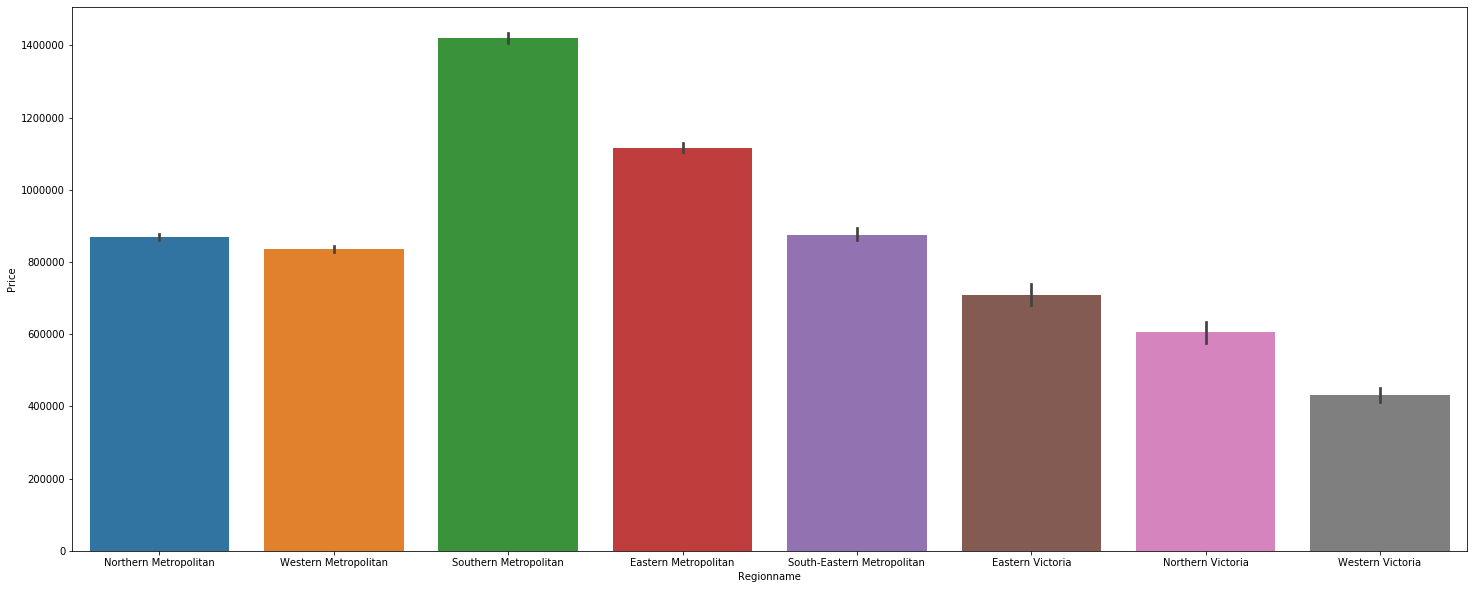

In [212]:
fig = plt.figure(figsize=(25,10))
sns.barplot(df2['Regionname'],df2['Price'])

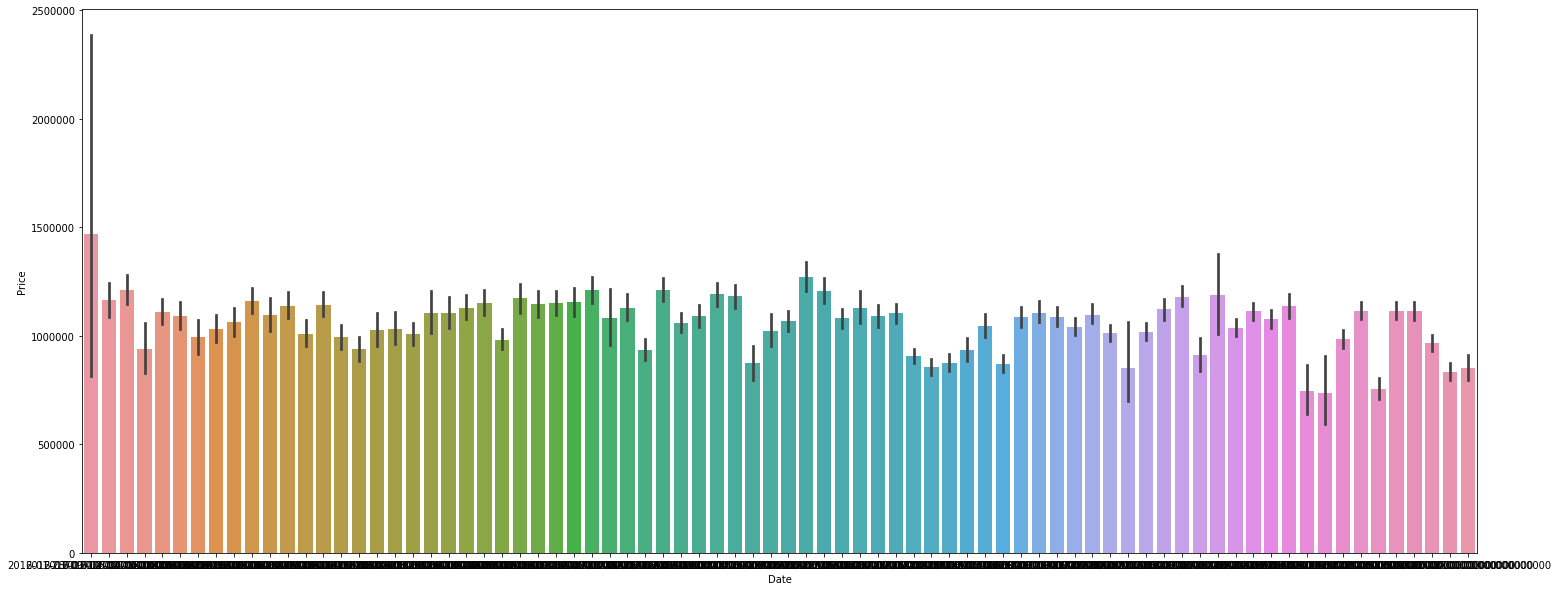

In [213]:
fig = plt.figure(figsize=(25,10))
sns.barplot(df2['Date'], df2['Price'])

In [214]:
df2.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname
0,Abbotsford,2,h,1.033549e+06,SS,Jellis,2016-03-09,2.5,2.0,1.0,1.0,126.0,103.610169,Yarra City Council,Northern Metropolitan
1,Abbotsford,2,h,1.480000e+06,S,Biggin,2016-03-12,2.5,2.0,1.0,1.0,202.0,103.610169,Yarra City Council,Northern Metropolitan
2,Abbotsford,2,h,1.035000e+06,S,Biggin,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.000000,Yarra City Council,Northern Metropolitan
3,Abbotsford,3,u,1.033549e+06,VB,Rounds,2016-04-02,2.5,3.0,2.0,1.0,0.0,103.610169,Yarra City Council,Northern Metropolitan
4,Abbotsford,3,h,1.465000e+06,SP,Biggin,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.000000,Yarra City Council,Northern Metropolitan


In [226]:
df2[df2['Suburb'] == 'Northcote']

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname
7271,Northcote,2,h,1.286000e+06,S,McGrath,2016-03-09,5.5,2.000000,1.000000,1.000000,245.000000,108.000000,Darebin City Council,Northern Metropolitan
7272,Northcote,3,h,1.200000e+06,S,Nelson,2016-03-09,5.5,3.000000,1.000000,1.000000,215.000000,125.000000,Darebin City Council,Northern Metropolitan
7273,Northcote,3,h,1.382500e+06,SA,Nelson,2016-03-09,5.5,3.000000,2.000000,2.000000,286.000000,188.000000,Darebin City Council,Northern Metropolitan
7274,Northcote,2,u,6.300000e+05,S,McGrath,2016-03-09,5.5,2.000000,2.000000,1.000000,0.000000,132.333333,Darebin City Council,Northern Metropolitan
7275,Northcote,4,h,1.600000e+06,VB,Jellis,2016-03-09,5.5,4.000000,2.000000,1.000000,464.000000,179.000000,Darebin City Council,Northern Metropolitan
7276,Northcote,4,h,1.239759e+06,SP,Ray,2016-03-12,5.5,4.000000,2.000000,2.000000,460.000000,205.000000,Darebin City Council,Northern Metropolitan
7277,Northcote,2,h,1.239759e+06,S,Nelson,2016-03-12,5.5,2.000000,1.000000,1.000000,186.000000,108.000000,Darebin City Council,Northern Metropolitan
7278,Northcote,2,u,1.239759e+06,PN,Nelson,2016-04-02,5.5,2.000000,1.000000,1.000000,0.000000,80.000000,Darebin City Council,Northern Metropolitan
7279,Northcote,3,h,1.310000e+06,PI,Jellis,2017-04-03,5.5,3.000000,2.000000,1.000000,267.000000,132.333333,Darebin City Council,Northern Metropolitan
7280,Northcote,2,h,1.035000e+06,S,Nelson,2017-04-03,5.5,2.000000,1.000000,0.000000,140.000000,132.333333,Darebin City Council,Northern Metropolitan


In [228]:
df3_Suburb_Northcote = df3[df3['Suburb'] == 'Northcote']
df3_Suburb_Northcote_avg = df3_Suburb_Northcote.groupby(['Year'])['Price'].mean()

In [229]:
x = df3_Suburb_Northcote[['Year']]
y = df3_Suburb_Northcote[['Price']]

In [230]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [231]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
print("Intercepts is {}".format(lr.intercept_))
print("Coefficients is {}".format(lr.coef_))

Intercepts is [-84132394.45021187]
Coefficients is [[42331.59934773]]


In [233]:
X = pd.DataFrame({'Year':[2019, 2020, 2021]})
lr.predict(X)

array([[1335104.63286227],
       [1377436.23221001],
       [1419767.83155774]])

In [236]:
df3_Suburb_Northcote = df3[(df3['Suburb'] == 'Northcote') & (df3['Bedroom2'] == 2.0)]
df3_Suburb_Northcote_avg = df3_Suburb_Northcote.groupby(['Year'])['Price'].mean()

x = df3_Suburb_Northcote[['Year']]
y = df3_Suburb_Northcote[['Price']]

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x, y)

print("Intercepts is {}".format(lr.intercept_))
print("Coefficients is {}".format(lr.coef_))

X = pd.DataFrame({'Year':[2019, 2020, 2021]})
lr.predict(X)

Intercepts is [-99659208.98974963]
Coefficients is [[49930.36340809]]


array([[1150194.73118466],
       [1200125.09459275],
       [1250055.45800084]])